In [5]:
a = [range(1,5), range(6,10)]

In [6]:
len(a[1])

4

In [18]:
import random
random.choices(a[1])[0]

7

In [22]:
for i, j in enumerate([3,6,8]):
    print(i, j)

0 3
1 6
2 8


In [24]:
a = {3:5, 2:8}
a.values()

dict_values([5, 8])

In [31]:
key = a.keys()
a[key[1]]

TypeError: 'dict_keys' object is not subscriptable

In [42]:
import numpy as np
np.random.normal(60, 3)

53.96004293624866

In [45]:
[idd for idd in [1,6,9]]

[1, 6, 9]

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:

# Read the data from the file
path = "/media/dataanalyticlab/Drive2/MANSOOR/DeFI-Agent/Code/Bonding-Curves/TBC-Agent-Based-Simulation/"
transactions_file_path = path + 'Results/tbc_sim_linear_2000Agents_30Months_transactions_log.txt'
agents_file_path = path + 'Results/MyAgents_2000.txt'
tokens_file_path = path + 'Results/MyTokens_for_2000_Agents.txt'

save_figures_path_path = path + "Figures/"
bondingCurveType = "linear"

# agents_df = pd.read_csv(agents_file_path, sep=" ")

data = {}
with open(agents_file_path, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.split()
        agent_id = int(parts[0])
        category = str(parts[2])
        init_liquidity = float(parts[1]) 

        if agent_id not in data:
            data[agent_id] = []
        data[agent_id].append((category, init_liquidity))

In [58]:
trans_df = pd.read_csv(transactions_file_path, sep=" ")
trans_df.head()

,TransactionID,AgentID,AgentLiquidity,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth
0,0,26,2127.076315,buy,0.162301,6,0.811507,0.811507,0.162301,1
1,1,26,2124.792048,buy,0.807260,6,4.847805,4.847805,0.969561,1
2,2,47,1497.424367,buy,0.961655,5,4.808274,4.808274,0.961655,1
3,3,27,1947.568139,buy,0.010129,2,0.050647,0.050647,0.010129,1
4,4,53,1861.139735,buy,0.192282,3,0.961410,0.961410,0.192282,1


In [59]:
agents_df = pd.read_csv(agents_file_path, sep=" ")
agents_df.head()

,AgentID,AgentLiquidity,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD
0,1,1865.716371,Speculator,noisy,0.662217,0.493945,0.000000,0,1,14
1,2,1667.633242,Speculator,noisy,0.549194,0.575738,0.000000,0,1,11
2,3,2338.826153,Speculator,noisy,0.561196,0.487907,0.000000,0,2,15
3,4,5434.189433,Utilizer,charty,0.463769,0.380686,0.000000,0,1,28
4,5,11388.217389,Investor,fundy,0.193401,0.115059,0.205033,0,2,49


In [60]:
tokens_df = pd.read_csv(tokens_file_path, sep=" ")
tokens_df.head()

,TokenID,OwnerAgentID,LifeCycleCurveShape,DoB,DoD
0,1,20,Traditional_4x,1,63
1,2,23,Traditional_4x,1,69
2,3,42,Traditional_1x,1,76
3,4,50,Bust_2x,1,74
4,5,57,Revival_1x,1,77


In [61]:
a = trans_df.merge(agents_df,  on="AgentID", how="left")
a

,TransactionID,AgentID,AgentLiquidity_x,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth,AgentLiquidity_y,AgentPurposeCategory,AgentStrategyType,RiskAppetite,ProActivity,IntelligenceGap,OwnTokenID,DoB,DoD
0,0,26,2127.076315,buy,0.162301,6,0.811507,0.811507,0.162301,1,2127.142170,Speculator,noisy,0.420672,0.430082,0.0,0,1,12
1,1,26,2124.792048,buy,0.807260,6,4.847805,4.847805,0.969561,1,2127.142170,Speculator,noisy,0.420672,0.430082,0.0,0,1,12
2,2,47,1497.424367,buy,0.961655,5,4.808274,4.808274,0.961655,1,1499.736316,Speculator,noisy,0.455984,0.479382,0.0,0,1,8
3,3,27,1947.568139,buy,0.010129,2,0.050647,0.050647,0.010129,1,1947.568396,Speculator,noisy,0.764672,0.524443,0.0,0,2,16
4,4,53,1861.139735,buy,0.192282,3,0.961410,0.961410,0.192282,1,1861.232166,Speculator,noisy,0.611846,0.589921,0.0,0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730091,730091,1043,1897.034190,clearance,0.073046,127,154.420679,154.420679,30.884136,30,2329.523636,Speculator,noisy,0.473640,0.674183,0.0,0,21,30
730092,730092,1043,2279.334641,clearance,0.368134,124,1035.721594,1035.721594,207.144319,30,2329.523636,Speculator,noisy,0.473640,0.674183,0.0,0,21,30
730093,730093,1043,2286.504291,clearance,0.040181,173,178.133009,178.133009,35.626602,30,2329.523636,Speculator,noisy,0.473640,0.674183,0.0,0,21,30
730094,730094,1043,2296.881556,clearance,0.054870,170,188.713122,188.713122,37.742624,30,2329.523636,Speculator,noisy,0.473640,0.674183,0.0,0,21,30


In [92]:
agents_liq_diff = a.loc[:,['AgentID', 'AgentPurposeCategory',"AgentLiquidity_y", "AgentLiquidity_x"]].groupby(['AgentID', 'AgentPurposeCategory']).max("TransactionID")
agents_liq_diff = agents_liq_diff.reset_index()
agents_liq_diff["LiquidityDifference"] = agents_liq_diff.loc[:,"AgentLiquidity_x"] -  agents_liq_diff.loc[:,"AgentLiquidity_y"]
# agents_liq_df = agents_liq_diff.loc[:,["AgentID", "AgentPurposeCategory"]]
agents_liq_diff


,AgentID,AgentPurposeCategory,AgentLiquidity_y,AgentLiquidity_x,LiquidityDifference
0,2,Speculator,1667.633242,19128.740711,17461.107468
1,3,Speculator,2338.826153,6598.328299,4259.502146
2,5,Investor,11388.217389,15120.478989,3732.261600
3,6,Investor,9509.692800,9513.797561,4.104761
4,8,Investor,8261.106790,8270.770417,9.663627
...,...,...,...,...,...
885,1673,Investor,10222.549125,10236.459238,13.910113
886,1676,Speculator,1814.446628,1731.960970,-82.485658
887,1678,Speculator,1925.239977,1925.249757,0.009780
888,1679,Utilizer,5233.677830,5171.285805,-62.392025


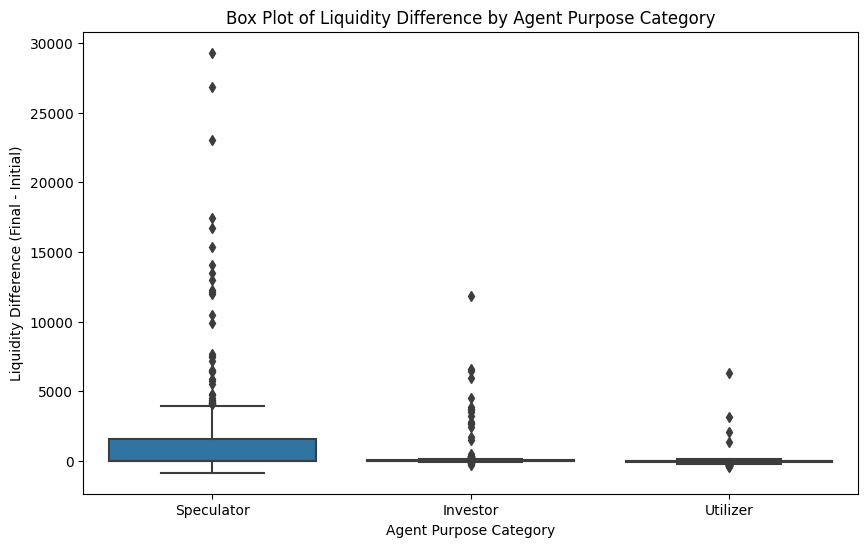

In [93]:
# Plotting the box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgentPurposeCategory', y='LiquidityDifference', data=agents_liq_diff)
plt.title('Box Plot of Liquidity Difference by Agent Purpose Category')
plt.xlabel('Agent Purpose Category')
plt.ylabel('Liquidity Difference (Final - Initial)')
plt.show()

In [ ]:
# Merge the datasets on AgentID
merged_df = pd.merge(trans_df, agents_df[['AgentID', 'AgentPurposeCategory']], on='AgentID')

# Group by PurposeCategory and SimulationMonth or TransactionID
grouped = merged_df.groupby(['AgentPurposeCategory', 'SimulationMonth'])

# Calculate the change in liquidity for each group
liquidity_change = grouped['AgentLiquidity'].sum().unstack()

# Plotting
liquidity_change.plot(kind='line')
plt.title('Change in Liquidity by Purpose Category Over Time')
plt.xlabel('Simulation Month')
plt.ylabel('Liquidity Change')
plt.legend(title='Purpose Category')
plt.show()

<Figure size 640x480 with 0 Axes>

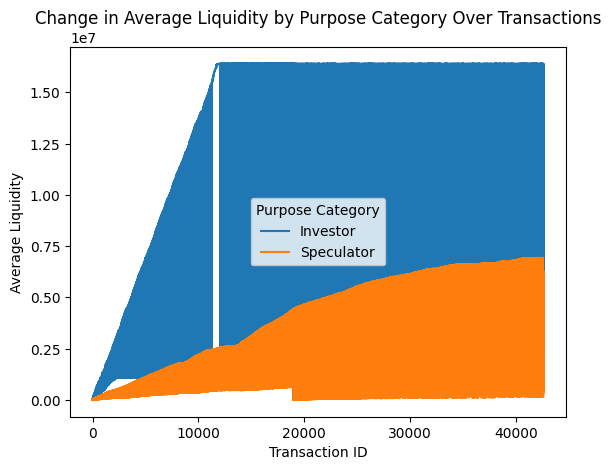

In [37]:
# Merge the datasets on AgentID
merged_df = pd.merge(trans_df, agents_df[['AgentID', 'AgentPurposeCategory']], on='AgentID')

# Sort by TransactionID to ensure correct order of transactions
merged_df.sort_values(by='TransactionID', inplace=True)

# Calculate the running total of liquidity for each agent
merged_df['RunningLiquidity'] = merged_df.groupby('AgentID')['AgentLiquidity'].cumsum()

# Group by PurposeCategory and TransactionID, then calculate the mean liquidity
grouped = merged_df.groupby(['AgentPurposeCategory', 'TransactionID'])['RunningLiquidity'].mean().unstack()
plt.figure()
# Plotting
grouped.T.plot(kind='line') # Transpose to have TransactionID on the x-axis
plt.title('Change in Average Liquidity by Purpose Category Over Transactions')
plt.xlabel('Transaction ID')
plt.ylabel('Average Liquidity')
plt.legend(title='Purpose Category')
plt.show()


In [38]:
merged_df

,TransactionID,AgentID,AgentLiquidity,TransactionType,DeltaSupply,TokenID,TokenCurrentBuyPrice,TokenCurrentSellPrice,TokenCurrentSupply,SimulationMonth,AgentPurposeCategory,RunningLiquidity
0,0,29,2.004140e+03,buy,9.527138e-01,2,4.763569,4.763569,0.952714,1,Speculator,2.004140e+03
885,1,9,1.604834e+03,buy,9.704529e-01,3,4.852265,4.852265,0.970453,1,Speculator,1.604834e+03
4810,2,44,1.135247e+04,buy,2.156373e-01,3,5.930451,5.930451,1.186090,1,Investor,1.135247e+04
4811,3,44,1.135266e+04,sell,3.291382e-02,3,5.765882,5.765882,1.153176,1,Investor,2.270513e+04
4812,4,44,1.135348e+04,sell,1.335696e-01,3,5.098034,5.098034,1.019607,1,Investor,3.405861e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
40460,42606,33,9.908357e+03,sell,2.330092e-243,4,176.259011,176.259011,35.251802,2,Investor,3.507558e+06
30403,42607,41,3.280155e+02,sell,1.787147e-02,3,721.139812,721.139812,144.227962,2,Speculator,4.084623e+05
27391,42608,57,2.399642e-207,buy,8.687625e-209,4,176.259011,176.259011,35.251802,2,Investor,1.232214e+06
16302,42609,22,2.964394e-323,buy,0.000000e+00,4,176.259011,176.259011,35.251802,2,Investor,1.638673e+07
